In [ ]:
#All Completed By Tom

In [25]:
#using 3.12.3
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import csv

In [ ]:
#NOTE run from scripts directory!
#read in the edge data
df = pd.read_csv('../data/edges.csv')
df

,Customer,Supplier
0,Volvo,AAPICO Hitech
1,Volvo,ABC Technologies
2,Volvo,Adient plc
3,Volvo,AGC
4,Volvo,Aisin
...,...,...
51358,Unipres,voestalpine Rotec
51359,Unipres,Xiangyang Sunrise
51360,Unipres,Yakumo Manufacturing
51361,Unipres,Yamashita Rubber


In [ ]:
#turn the edges into integer encodings, rather than text labels
all_suppliers = set(df['Customer'].tolist() + df['Supplier'].tolist())
nametoi = {name: i for i, name in enumerate(all_suppliers)}
edges = []

for _, row in df.iterrows():
    supplier1, supplier2 = row
    idx1, idx2 = nametoi[supplier1], nametoi[supplier2]
    edges.append((idx1, idx2))

In [5]:
# Create the graph
G = nx.Graph()
G.add_edges_from(edges)

In [ ]:
#find the diameter
print(f'The diameter of the graph is {nx.diameter(G)}')

The diameter of the graph is 6


In [ ]:
#get the degree centralities of every node
deg_centr = nx.degree_centrality(G)

In [ ]:
#sort the nodes based on their degree centralities
top_deg_centr = sorted(deg_centr.items(), key=lambda item: item[1],reverse=True)

In [ ]:
#get the dictionary for turning the integer encoding back into their name
itoname = {i: name for name, i in nametoi.items()}

In [ ]:
#get the top 5 suppliers/customers
top_5_deg_centr = top_deg_centr[:5]
#create a composed graph of the top 5 suppliers/customers and their neighbors
top_5_G = nx.Graph()
if_no_overlap = 0
for node, deg_cent in top_5_deg_centr: #for all nodes in the top 5 degree centralities
    #create a graph consisting of the supplier/customer and their neighbors
    top_n_G = nx.Graph()
    for neighbor in G.neighbors(node):
        top_n_G.add_edge(node, neighbor)
    #add the amount of edges that would be in the graph if there were no overlap between all neighbors
    if_no_overlap += top_n_G.number_of_edges()
    #compose the top_n_G with the top_5_G
    top_5_G = nx.compose(top_5_G, top_n_G)
    #print the top 5 names and their degree centralities
    print(f'{itoname[node]}: {deg_cent}')

Dongfeng: 0.17609476906695062
Dongfeng Motor: 0.16205244243311595
Volvo: 0.12145614268601092
Shanghai Automotive: 0.07101024890190337
Robert Bosch: 0.06854785039265274


In [ ]:
#find the number of overlaps
print(f'of the {top_5_G.number_of_edges()} customers/suppliers to the top 5 customers/suppliers, only {if_no_overlap - top_5_G.number_of_edges()} of them are shared')

of the 8994 customers/suppliers to the top 5 customers/suppliers, only 6 of them are shared


In [ ]:
#get a node and its neighbors that has overlap with below node and its neighbors 
top_601_G = nx.Graph()
for neighbor in G.neighbors(top_deg_centr[600][0]):
    top_601_G.add_edge(itoname[top_deg_centr[600][0]], itoname[neighbor])

In [ ]:
#get a node and its neighbors that has overlap with above node and its neighbors 
top_602_G = nx.Graph()
for neighbor in G.neighbors(top_deg_centr[601][0]):
    top_602_G.add_edge(itoname[top_deg_centr[601][0]], itoname[neighbor])

In [ ]:
#compose the graphs with eachother to get the overlapped graph
top_G = nx.compose(top_601_G, top_602_G)

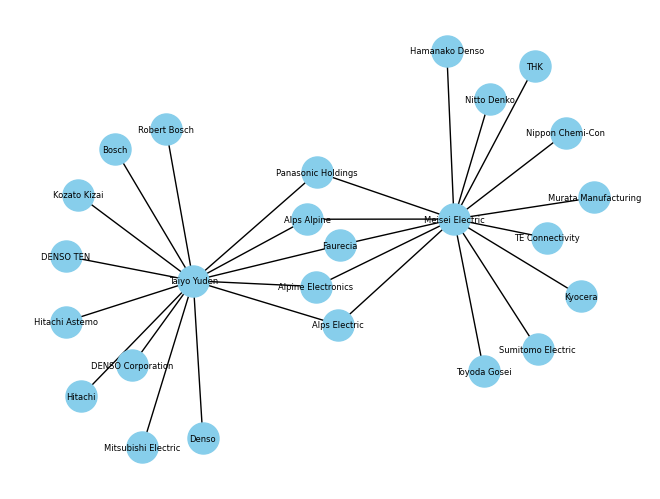

In [ ]:
#plot the overlapped graph
nx.draw(top_G, with_labels=True, font_size = 6, node_size=500, node_color="skyblue")
plt.show()